<a href="https://colab.research.google.com/github/vinayakbs311/salary_prediction_linear_regression/blob/main/20_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear regression

In [ ]:
#load libraries
import pandas as pd

#### In general flow of ML:
    - load data
    - perform some EDA
    - Preprocessing
    - if we have one dataset : separate X(input) and y(Output)
    - Call the algorithm/Create an object of an algo.
    - Perform Model Training
    - Perform Model Testing
    - Check performance using some accuracy measures
    - if accuracy is nt good then find out the reason
    - or try some hyeperparamter tuning

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

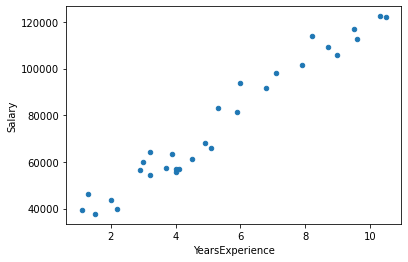

In [ ]:
#1 input(YearsofExp) + 1 Output(Salary)
#lets check relation between input and output
df.plot.scatter(x='YearsExperience',y='Salary')

In [ ]:
df.corr().style.background_gradient('Blues')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
# Separate X and y
# in ML: input must be in 2D
X = df[['YearsExperience']]
X[:2]

,YearsExperience
0,1.1
1,1.3


In [ ]:
y = df.Salary
y[:2]

0    39343.0
1    46205.0
Name: Salary, dtype: float64

### for ML, we use sklearn library also known as Scikit learn

In [ ]:
#Call the algorithm/Create an object of an algo.
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model

LinearRegression()

### - Perform Model Training

In [ ]:
# fit()= method is used to perform training of an algo.
model.fit(X,y)

LinearRegression()

### - Perform Model Testing

In [ ]:
#to test/evaluate model use predict() method
model.predict([[1.1]])

array([36187.15875227])

In [ ]:
df.sample(5)

,YearsExperience,Salary
10,3.9,63218.0
14,4.5,61111.0
1,1.3,46205.0
0,1.1,39343.0
3,2.0,43525.0


In [ ]:
model.predict([[3.2],[8.2],[4.9],[9.6],[5.9]])

array([ 56032.07962732, 103281.8912346 ,  72097.0155738 , 116511.83848464,
        81546.97789525])

In [ ]:
X.min(),X.max()

(YearsExperience    1.1
 dtype: float64,
 YearsExperience    10.5
 dtype: float64)

In [ ]:
# beyond min and max u can predict
#lets checksalary for Fresher
model.predict([[0]])

array([25792.20019867])

In [ ]:
#if a person with exp 16 yrs
model.predict([[16]])

array([176991.59734195])

In [ ]:
"""
import time
print('Welcome to salary Calculator')
time.sleep(2)
exp = float(input('Enter your Experience in yrs:'))
sal = round(float(model.predict([[exp]])),2)
print('For experience',exp,'yrs','your predicted salary is:Rs.',sal)
"""

"\nimport time\nprint('Welcome to salary Calculator')\ntime.sleep(2)\nexp = float(input('Enter your Experience in yrs:'))\nsal = round(float(model.predict([[exp]])),2)\nprint('For experience',exp,'yrs','your predicted salary is:Rs.',sal)\n"

In [ ]:
round(float(model.predict([[16]])),2)

176991.6

In [ ]:
test = df.sample(10)
test[:3]

,YearsExperience,Salary
2,1.5,37731.0
29,10.5,121872.0
18,5.9,81363.0


In [ ]:
test_input = test[['YearsExperience']]
test_input

,YearsExperience
2,1.5
29,10.5
18,5.9
21,7.1
4,2.2
24,8.7
12,4.0
6,3.0
14,4.5
27,9.6


In [ ]:
#predict on above input
predicted = model.predict(test_input)
predicted

array([ 39967.14368085, 125016.80457395,  81546.97789525,  92886.932681  ,
        46582.11730587, 108006.87239533,  63592.04948449,  54142.08716303,
        68317.03064522, 116511.83848464])

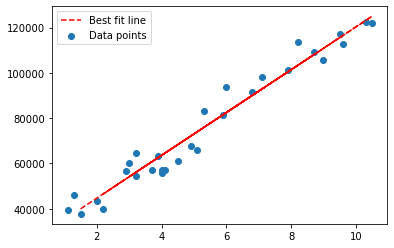

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y,label='Data points')
plt.plot(test_input,predicted,'--r',label='Best fit line')
plt.legend()

In [ ]:
model.predict([[0]])

array([25792.20019867])

# y_pred = mx + c

In [ ]:
#slope/m
m = model.coef_
m

array([9449.96232146])

In [ ]:
#c:intercept
c = model.intercept_
c

25792.20019866871

In [ ]:
m*0 + c

array([25792.20019867])

In [ ]:
#12 yrs of exp
m*12 + c

array([139191.74805613])

In [ ]:
model.predict([[12]])

array([139191.74805613])

## Calculate Error
#### error = actual_value - predicted_value

In [ ]:
test['predicted'] = predicted
test

,YearsExperience,Salary,predicted
2,1.5,37731.0,39967.143681
29,10.5,121872.0,125016.804574
18,5.9,81363.0,81546.977895
21,7.1,98273.0,92886.932681
4,2.2,39891.0,46582.117306
24,8.7,109431.0,108006.872395
12,4.0,56957.0,63592.049484
6,3.0,60150.0,54142.087163
14,4.5,61111.0,68317.030645
27,9.6,112635.0,116511.838485


In [ ]:
#change column names as input actual predicted
test.columns = ['input','actual','predicted']

In [ ]:
#calculate error=act-pred
# add a new column error
test['error'] = round((test.actual - test.predicted),2)

In [ ]:
test

,input,actual,predicted,error
2,1.5,37731.0,39967.143681,-2236.14
29,10.5,121872.0,125016.804574,-3144.80
18,5.9,81363.0,81546.977895,-183.98
21,7.1,98273.0,92886.932681,5386.07
4,2.2,39891.0,46582.117306,-6691.12
24,8.7,109431.0,108006.872395,1424.13
12,4.0,56957.0,63592.049484,-6635.05
6,3.0,60150.0,54142.087163,6007.91
14,4.5,61111.0,68317.030645,-7206.03
27,9.6,112635.0,116511.838485,-3876.84


In [ ]:
y1 = 112635.0
#mean 
y_bar = test.actual.mean()
y_hat = 116511.838485

In [ ]:
r2 = SSR/SST

In [ ]:
(y_hat - y_bar)/(y1-y_bar)

1.1117450620575553

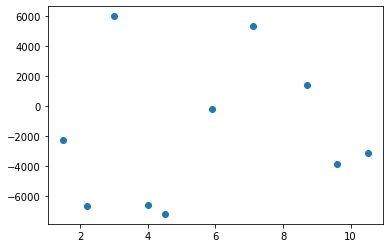

In [ ]:
#plt.scatter(test.input,test.actual)
#plt.plot(test.input,test.predicted,'--k')
plt.scatter(test.input,test.error)

## - Check performance using some accuracy measures

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#MAE
mean_absolute_error(test.actual,test.predicted)

4279.206983090329

In [ ]:
test.error.mean()

-1715.5849999999998

In [ ]:
#MSE 
mean_squared_error(test.actual,test.predicted)

23780854.62497396

In [ ]:
# R2 score/R square/Coeficient of determination
# Model accuracy
r2_score(test.actual,test.predicted)

0.9725237878325123

In [ ]:
#check Data accuracy
model.score(X,y)*100

95.69566641435085

In [ ]:
#RMSE
import numpy as np
np.sqrt(mean_squared_error(test.actual,test.predicted))

4876.561762653474

In [ ]:
Evaluation metrics
Evaluation measures
Accuracy measure
Accuracy metrics
Performance metrics
Performance measures

In [ ]:
#IMP Que: Assignment: Adjusted R2 score
# Q. difference between r2 score and Adjusted r2 score

In [ ]:



- if accuracy is nt good then find out the reason
- or try some hyeperparamter tuning